**Librerias**

*Selección e importación:* las librerias seleccionadas e importadas a continuación son las necesarias para realizar un análisis exploratorio del DataFrame "Peliculas".

In [151]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from scipy import stats
from sklearn.preprocessing import LabelEncoder

**Análisis exploratorio de datos**

*Caracterización del DataFrame:* Para realizar la caracterización del DataFrame se determinó cantidad de filas y columnas, nombre de las columnas y tipos de variables.

In [152]:
df = pd.read_csv('Movie_Data_File2.csv')

In [153]:
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


In [154]:
#Cantidad de filas y columnas
df.shape

(10002, 29)

In [155]:
#Nombre de las columnas y tipos de variables
df.dtypes

Film_title            object
Release_year         float64
Director              object
Cast                  object
Average_rating       float64
Owner_rating         float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Spoken_languages      object
Description           object
Studios               object
Watches                int64
List_appearances       int64
Likes                  int64
Fans                   int64
½                      int64
★                      int64
★½                     int64
★★                     int64
★★½                    int64
★★★                    int64
★★★½                   int64
★★★★                   int64
★★★★½                  int64
★★★★★                  int64
Total_ratings          int64
Film_URL              object
dtype: object

**Analisis de variables categoricas**

*Cast*

Eliminar datos de la columna Cast, dejando solamente los dos primeros actores

In [156]:
def extraer_dos_actores(cadena):
    if isinstance(cadena, str):
        actores = [actor.strip() for actor in cadena.split(',')]
        return pd.Series(actores[:2]) 
    return pd.Series([None, None]) 

df[['Protagonista', 'Coprotagonista']] = df['Cast'].apply(extraer_dos_actores)
df.drop(columns=['Cast'], inplace=True)


In [157]:
print(df[['Protagonista', 'Coprotagonista']].head())

          Protagonista        Coprotagonista
0  ['Désirée Nosbusch'        'Bodo Staiger'
1         ['Tom Hardy'     'Charlize Theron'
2    ['Jessica Harper'     'Stefania Casini'
3       ['Bill Murray'  'Scarlett Johansson'
4      ['Mitsuo Iwata'       'Nozomu Sasaki'


Observamos que hay Protagonistas repetidos, por lo tanto procederemos a unificarlos

In [158]:
df['Protagonista'] = df['Protagonista'].astype(str)  

df['Protagonista'] = df['Protagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Protagonista'] = df['Protagonista'].str.strip()

df['Protagonista'] = df['Protagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Haremos lo mismo con los coprotagonistas

In [159]:
df['Corotagonista'] = df['Coprotagonista'].astype(str)  

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Coprotagonista'] = df['Coprotagonista'].str.strip()

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Realizamos el conteo

In [160]:
conteo_Protagonista = df['Protagonista'].value_counts()
print(conteo_Protagonista)

Protagonista
None                           57
Mel Blanc                      49
Nicolas Cage                   36
Sean Connery                   33
Johnny Depp                    33
Adam Sandler                   32
Tom Hanks                      30
Jack Nicholson                 29
Tom Cruise                     29
Sylvester Stallone             27
Elizabeth Taylor               26
Robert De Niro                 26
Cary Grant                     25
Keanu Reeves                   23
Kevin Bacon                    22
Will Smith                     22
Jackie Chan                    21
Brad Pitt                      21
Al Pacino                      21
Val Kilmer                     20
Vincent Price                  20
Bruce Willis                   20
Franco Nero                    20
Mark Wahlberg                  19
Mel Gibson                     19
Clint Eastwood                 19
Leonardo DiCaprio              19
Harrison Ford                  19
Will Ferrell                   18
C

In [161]:
conteo_Coprotagonista = df['Coprotagonista'].value_counts()
print(conteo_Coprotagonista)

Coprotagonista
Robert De Niro                  14
Tommy Lee Jones                 14
Rose Byrne                      13
Val Kilmer                      13
Jude Law                        12
Zoe Saldaña                     12
Jack Nicholson                  12
Nicole Kidman                   12
Angelina Jolie                  11
Mia Farrow                      11
Cate Blanchett                  11
Ben Kingsley                    11
Willem Dafoe                    11
Gary Oldman                     11
Samuel L. Jackson               10
Michael Shannon                 10
Laurence Fishburne              10
Bridget Fonda                   10
Anne Hathaway                   10
Peter Cushing                   10
Rachel McAdams                  10
Holly Hunter                    10
Elizabeth Taylor                10
Karen Black                      9
Anthony Quinn                    9
Colin Firth                      9
Owen Wilson                      9
Harrison Ford                    9
Antho

*Genres*

Eliminar datos de la columna Genres, dejando solamente el primero

In [162]:
def extraer_primer_genero(cadena):
    if isinstance(cadena, str):
        generos = [g.strip() for g in cadena.split(',')]
        return generos[0] if generos else ''
    return ''
df['Genres'] = df['Genres'].apply(extraer_primer_genero)

In [163]:
print(df[['Genres']].head())

         Genres
0     ['Horror'
1  ['Adventure'
2    ['Horror']
3      ['Drama'
4  ['Animation'


Observamos que hay generos repetidos, por lo tanto procederemos a unificarlos

In [164]:
df['Genres'] = df['Genres'].astype(str)  

df['Genres'] = df['Genres'].str.replace(r"[\[\]']", "", regex=True)

df['Genres'] = df['Genres'].str.strip()

df['Genres'] = df['Genres'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que no hay valores repetidos

In [165]:
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes' '']


Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga. (ver cuantas son)

In [166]:
conteo = (df['Genres'] == '').sum()
print(conteo)

24


In [167]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Genres'] = df['Genres'].str.strip()
df = df[df['Genres'] != '']

In [168]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes']


Realizamos el conteo

In [169]:
conteo_Genres = df['Genres'].value_counts()
print(conteo_Genres)

Genres
Drama              2232
Comedy             1423
Horror              867
Thriller            802
Action              734
Crime               529
Romance             504
Science Fiction     443
Adventure           421
Documentary         338
Fantasy             333
Mystery             261
Animation           231
Family              219
History             164
Western             159
War                 129
Music               118
TV Movie             69
Epic heroes           2
Name: count, dtype: int64


*Countries*

Eliminar datos de la columna Countries, dejando solamente el primero

In [170]:
def extraer_primer_pais(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Countries'] = df['Countries'].apply(extraer_primer_pais)


In [171]:
print(df[['Countries']].head())

      Countries
0   ['Germany']
1  ['Australia'
2     ['Italy']
3         ['UK'
4     ['Japan']


In [172]:
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
["['Germany']" "['Australia'" "['Italy']" "['UK'" "['Japan']" "['Germany'"
 "['USA']" "['UK']" "['France'" "['Ireland'" "['USA'" "['Belgium'"
 "['Mexico'" "['Czechoslovakia'" "['Mexico']" "['South Korea'"
 "['France']" "['New Zealand'" "['Italy'" "['Hong Kong']"
 "['South Korea']" "['Canada'" "['Canada']" "['China'" "['USSR']"
 "['Denmark'" "['Japan'" "['Austria']" "['Australia']" "['Sweden']"
 "['Spain']" "['India'" "['Brazil'" "['Sweden'" "['Switzerland'"
 "['Netherlands']" "['Spain'" "['Netherlands'" "['Poland']" "['Czechia'"
 "['Hong Kong'" "['New Zealand']" "['Slovakia'" "['Bulgaria'" "['Hungary'"
 '' "['USSR'" "['Austria'" "['Russia'" "['Iceland'" "['Turkey'"
 "['United Arab Emirates'" "['South Africa'" "['Thailand'" "['Greece']"
 "['Greece'" "['Poland'" "['Norway']" "['Argentina'" "['Indonesia']"
 "['Philippines'" "['Colombia'" "['Czechoslovakia']" "['Russia']"
 "['Indonesia'" "['Ireland']" "['Chile'" "['Turkey']" "['Romania'"
 "['India

Observamos que hay paises repetidos, por lo tanto procederemos a unificarlos

In [173]:
df['Countries'] = df['Countries'].astype(str)  

df['Countries'] = df['Countries'].str.replace(r"[\[\]']", "", regex=True)

df['Countries'] = df['Countries'].str.strip()

df['Countries'] = df['Countries'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que ya no haya valores repetidos

In [174]:
df['Countries'].unique()

array(['Germany', 'Australia', 'Italy', 'UK', 'Japan', 'USA', 'France',
       'Ireland', 'Belgium', 'Mexico', 'Czechoslovakia', 'South Korea',
       'New Zealand', 'Hong Kong', 'Canada', 'China', 'USSR', 'Denmark',
       'Austria', 'Sweden', 'Spain', 'India', 'Brazil', 'Switzerland',
       'Netherlands', 'Poland', 'Czechia', 'Slovakia', 'Bulgaria',
       'Hungary', '', 'Russia', 'Iceland', 'Turkey',
       'United Arab Emirates', 'South Africa', 'Thailand', 'Greece',
       'Norway', 'Argentina', 'Indonesia', 'Philippines', 'Colombia',
       'Chile', 'Romania', 'Singapore', 'Israel', 'Cross Country',
       'Ukraine', 'Dominican Republic', 'Libya', 'Iraq', 'Bolivia',
       'Lithuania', 'Malaysia', 'Finland', 'Luxembourg', 'Taiwan',
       'Syrian Arab Republic', 'Ivory Coast', 'Country Club', 'Bahamas',
       'Cuba', 'Jamaica', 'Iran', 'Bosnia and Herzegovina',
       'Burkina Faso', 'Nepal', 'Serbia', 'Portugal', 'Aruba', 'Ecuador',
       'Panama', 'Estonia', 'Uganda', 'Jorda

Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga. (ver cuantos son)

Primero veremos cuantas filas contienen ' '

In [175]:
conteo = (df['Countries'] == '').sum()
print(conteo)

105


In [176]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Countries'] = df['Countries'].str.strip()
df = df[df['Countries'] != '']

In [177]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
['Germany' 'Australia' 'Italy' 'UK' 'Japan' 'USA' 'France' 'Ireland'
 'Belgium' 'Mexico' 'Czechoslovakia' 'South Korea' 'New Zealand'
 'Hong Kong' 'Canada' 'China' 'USSR' 'Denmark' 'Austria' 'Sweden' 'Spain'
 'India' 'Brazil' 'Switzerland' 'Netherlands' 'Poland' 'Czechia'
 'Slovakia' 'Bulgaria' 'Hungary' 'Russia' 'Iceland' 'Turkey'
 'United Arab Emirates' 'South Africa' 'Thailand' 'Greece' 'Norway'
 'Argentina' 'Indonesia' 'Philippines' 'Colombia' 'Chile' 'Romania'
 'Singapore' 'Israel' 'Cross Country' 'Ukraine' 'Dominican Republic'
 'Libya' 'Iraq' 'Bolivia' 'Lithuania' 'Malaysia' 'Finland' 'Luxembourg'
 'Taiwan' 'Syrian Arab Republic' 'Ivory Coast' 'Country Club' 'Bahamas'
 'Cuba' 'Jamaica' 'Iran' 'Bosnia and Herzegovina' 'Burkina Faso' 'Nepal'
 'Serbia' 'Portugal' 'Aruba' 'Ecuador' 'Panama' 'Estonia' 'Uganda'
 'Jordan' 'Pakistan' 'Nigeria' 'Yugoslavia' 'Malawi' 'Ghana' 'Lebanon'
 'Peru' 'Albania' 'Egypt' 'Netherlands Antilles' 'Mongolia' 'Be

Realizamos el conteo

In [178]:
conteo_Countries = df['Countries'].value_counts()
print(conteo_Countries)

Countries
USA                                  5636
UK                                    863
France                                525
Italy                                 373
Canada                                354
Japan                                 348
Germany                               301
Australia                             148
South Korea                           148
Spain                                 106
Belgium                               105
Hong Kong                              97
Denmark                                89
China                                  77
Mexico                                 57
New Zealand                            47
Philippines                            42
India                                  37
Ireland                                35
Brazil                                 32
USSR                                   32
Sweden                                 31
Poland                                 26
Netherlands             

*Studios*

Eliminar datos de la columna Studios, dejando solamente el primero

In [179]:
def extraer_primer_productor(cadena):
    if isinstance(cadena, str):
        productor = [g.strip() for g in cadena.split(',')]
        return productor [0] if productor else ''
    return ''
df['Studios'] = df['Studios'].apply(extraer_primer_productor)

In [180]:
print(df[['Studios']].head())

                       Studios
0  ['Barbara Moorse Workshop']
1     ['Warner Bros. Pictures'
2          ['Seda Spettacoli']
3         ['American Zoetrope'
4                       ['MBS'


Eliminamos los Studios repetidos y verificamos que se hayan realizado los cambios con exito.

In [181]:
df['Studios'] = df['Studios'].astype(str)  

df['Studios'] = df['Studios'].str.replace(r"[\[\]']", "", regex=True)

df['Studios'] = df['Studios'].str.strip()

df['Studios'] = df['Studios'].str.replace(r"\s*,\s*", ", ", regex=True)

In [182]:
conteo_Studios = df['Studios'].value_counts()
print(conteo_Studios)

Studios
Paramount Pictures                                                   303
Universal Pictures                                                   249
                                                                     222
Columbia Pictures                                                    217
Warner Bros. Pictures                                                203
Metro-Goldwyn-Mayer                                                  157
20th Century Fox                                                     134
New Line Cinema                                                       92
Walt Disney Pictures                                                  78
United Artists                                                        62
Orion Pictures                                                        53
TriStar Pictures                                                      49
Touchstone Pictures                                                   49
Walt Disney Productions                    

*Director*

Eliminar datos de la columna Director, dejando solamente el primero

In [183]:
def extraer_primer_director(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Director'] = df['Director'].apply(extraer_primer_pais)

In [184]:
conteo_directores = df['Director'].value_counts()
print(conteo_directores)

Director
Chuck Jones                        54
Cirio H. Santiago                  41
Antonio Margheriti                 39
William Witney                     33
Steven Spielberg                   31
Robert Stevenson                   31
Roger Corman                       28
Roy Rowland                        28
Sergio Martino                     27
Sergio Corbucci                    26
Ridley Scott                       26
J. Lee Thompson                    26
Ken Russell                        24
Woody Allen                        24
Federico Fellini                   22
Steven Soderbergh                  22
John Sturges                       22
Teruo Ishii                        21
Wes Craven                         21
Joel Schumacher                    21
Howard Hawks                       21
Richard Donner                     21
Martin Scorsese                    21
Larry Cohen                        20
Alfred Hitchcock                   20
Uli Edel                           20
Mar

**Columnas**

*Eliminación de columnas según objetivos*

In [185]:
#Eliminación de columnas: Release_year por tener totalidad de datos faltantes y el resto de la columnas por no contener información necesaria para nuestro análisis
df = df.drop(columns=['Release_year', 'Owner_rating' , 'Spoken_languages', 'List_appearances', 'Fans', '½' , '★' , '★½' , '★★' , '★★½' , '★★★' , '★★★½' , '★★★★' , '★★★★½' , '★★★★★'])

In [186]:
#Comprobamos la eliminación de las columnas no deseadas
df.shape
df.dtypes

Film_title            object
Director              object
Average_rating       float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Description           object
Studios               object
Watches                int64
Likes                  int64
Total_ratings          int64
Film_URL              object
Protagonista          object
Coprotagonista        object
Corotagonista         object
dtype: object

*Traducción del nombre de las columnas*

In [187]:
#Cambio del nombre de las columnas 
df = df.rename(columns={'Film_title' : 'Titulo' , 'Average_rating' : 'Calificación_promedio', 'Genres' : 'Genero', 'Runtime' : 'Duración' , 'Countries' : 'Pais' , 'Original_language' : 'Lenguaje' , 'Description' : 'Descripcion', 'Studios' : 'Productora' , 'Watches' : 'Vistas', 'Total_ratings': 'Ratings' , 'Film_URL' : 'Enlace'})
print(df.columns)

Index(['Titulo', 'Director', 'Calificación_promedio', 'Genero', 'Duración',
       'Pais', 'Lenguaje', 'Descripcion', 'Productora', 'Vistas', 'Likes',
       'Ratings', 'Enlace', 'Protagonista', 'Coprotagonista', 'Corotagonista'],
      dtype='object')


**Valores faltantes**

*Identificacion de valores faltantes y manejo* 

In [188]:
#Identificación de valores faltantes
df.isnull().sum()

Titulo                     0
Director                   0
Calificación_promedio    522
Genero                     0
Duración                   8
Pais                       0
Lenguaje                   0
Descripcion                2
Productora                 0
Vistas                     0
Likes                      0
Ratings                    0
Enlace                     0
Protagonista               0
Coprotagonista           123
Corotagonista              0
dtype: int64

Obtenemos % de datos faltantes numericos para definir el manejo de los mismos

In [189]:
masnan = df.isnull().sum().max()
filas_total= len(df)
resultado1 = (masnan / filas_total) * 100
print(f"El porcentaje máximo de valores nulos por columna es igual a {resultado1:.2f} %")

El porcentaje máximo de valores nulos por columna es igual a 5.29 %


La falta de datos numéricos es aleatoria y por lo tanto los manejaremos a través de la *Imputación Simple* utilizando la media, ya que con la *Eliminación de filas* perderíamos infrmación importante contenida en el resto de las columnas de la misma fila. Por otra parte, al ser bajo el % de datos faltantes respecto a la totalidad, la Imputación no cambiara la distribución de nuestros datos.

In [190]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Calificación_promedio']=imp.fit_transform(df[['Calificación_promedio']])

In [191]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Duración']=imp.fit_transform(df[['Duración']])

In [192]:
#Compruebo que la imputación de los datos numéricos se realizó con exito
df.isnull().sum()

Titulo                     0
Director                   0
Calificación_promedio      0
Genero                     0
Duración                   0
Pais                       0
Lenguaje                   0
Descripcion                2
Productora                 0
Vistas                     0
Likes                      0
Ratings                    0
Enlace                     0
Protagonista               0
Coprotagonista           123
Corotagonista              0
dtype: int64

Eliminación de filas con datos faltantes categóricos

In [193]:
df = df.dropna(subset=['Descripcion' , 'Coprotagonista'], axis=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9749 entries, 0 to 10001
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Titulo                 9749 non-null   object 
 1   Director               9749 non-null   object 
 2   Calificación_promedio  9749 non-null   float64
 3   Genero                 9749 non-null   object 
 4   Duración               9749 non-null   float64
 5   Pais                   9749 non-null   object 
 6   Lenguaje               9749 non-null   object 
 7   Descripcion            9749 non-null   object 
 8   Productora             9749 non-null   object 
 9   Vistas                 9749 non-null   int64  
 10  Likes                  9749 non-null   int64  
 11  Ratings                9749 non-null   int64  
 12  Enlace                 9749 non-null   object 
 13  Protagonista           9749 non-null   object 
 14  Coprotagonista         9749 non-null   object 
 15  Corotago

In [194]:
#Compruebo que la eliminacion de filas con datos faltantes se realizó con exito
df.isnull().sum()

Titulo                   0
Director                 0
Calificación_promedio    0
Genero                   0
Duración                 0
Pais                     0
Lenguaje                 0
Descripcion              0
Productora               0
Vistas                   0
Likes                    0
Ratings                  0
Enlace                   0
Protagonista             0
Coprotagonista           0
Corotagonista            0
dtype: int64

**Outliers**

*Identificacion de Outliers y manejo*

Identificamos que variables contienen valores numericos

In [195]:
print(df.select_dtypes(include=['number']).columns)

Index(['Calificación_promedio', 'Duración', 'Vistas', 'Likes', 'Ratings'], dtype='object')


Visualización de distribución y valores extremos para luego seleccionar la estrategia de manejo.

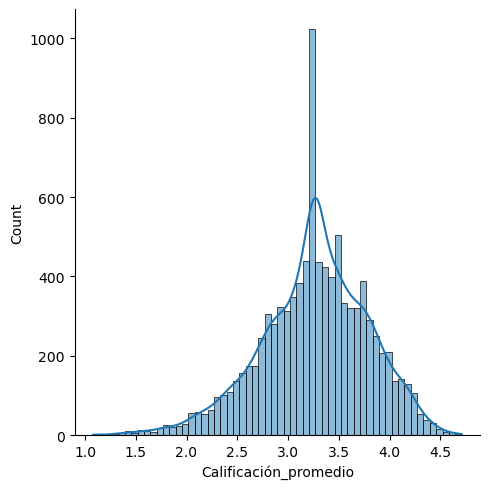

In [196]:
sns.displot(df['Calificación_promedio'], kde=True) 
sns.despine() 

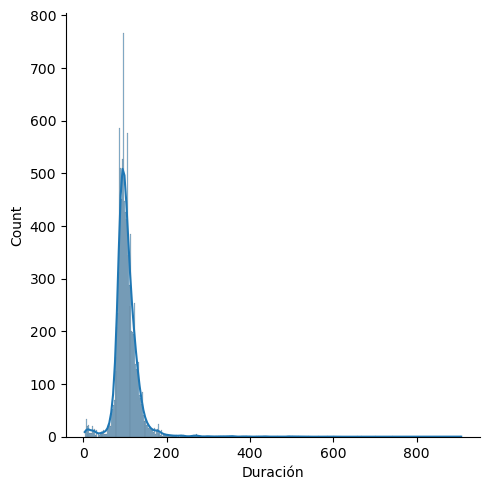

In [197]:
sns.displot(df['Duración'], kde=True) 
sns.despine() 

Debido a que las variables Calificación promedio y Duración presentan distribución normal utilizaremos zscore para detectar outliers

*Calificación_promedio*

In [198]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Calificación_promedio'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Calificación_promedio', 'zscore']])

Cantidad de outliers encontrados: 54
      Calificación_promedio    zscore
157                    1.49 -3.363293
650                    1.57 -3.211647
1050                   1.66 -3.041046
1100                   1.65 -3.060002
1172                   1.68 -3.003135
1705                   1.35 -3.628673
1827                   1.43 -3.477027
1993                   1.56 -3.230603
2506                   1.28 -3.761362
2575                   1.49 -3.363293
2935                   1.53 -3.287470
3215                   1.63 -3.097913
3220                   1.11 -4.083609
3221                   1.40 -3.533894
3222                   1.54 -3.268514
3223                   1.57 -3.211647
3227                   1.62 -3.116869
3812                   1.34 -3.647628
4176                   1.24 -3.837185
4178                   1.29 -3.742407
4333                   1.60 -3.154780
4366                   1.44 -3.458071
4367                   1.68 -3.003135
4531                   1.52 -3.306426
4652         

In [199]:
print("Valor mínimo:", df['Calificación_promedio'].min())
print("Valor máximo:", df['Calificación_promedio'].max())

Valor mínimo: 1.08
Valor máximo: 4.71


La calificación promedio tiene un rango de 1 a 5 por lo tanto los valores que estadisticamente son identificados como outliers, son calificaciones promedio bajas pero se encuntran dentro del rango que podria recibir una pelicula, por lo tanto dichos valores seran conservados.

*Duración*

In [200]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 100
      Duración     zscore
12       228.0   3.424541
145      233.0   3.562635
369      467.0  10.025463
717      379.0   7.594998
889      316.0   5.855006
1026     222.0   3.258827
1029     220.0   3.203589
1262     240.0   3.755968
1405     436.0   9.169276
1419     384.0   7.733092
1423     300.0   5.413103
1449     229.0   3.452159
1461     361.0   7.097857
1588     254.0   4.142632
1768     358.0   7.015000
1821     566.0  12.759736
1999     273.0   4.667392
2260     270.0   4.584535
2394     225.0   3.341684
2976     215.0   3.065495
2980     269.0   4.556916
2984     267.0   4.501678
2996     267.0   4.501678
2997     260.0   4.308346
2998     263.0   4.391203
2999     302.0   5.468341
3000     224.0   3.314065
3005     264.0   4.418822
3034     382.0   7.677854
3082     743.0  17.648284
3084     238.0   3.700730
3672     219.0   3.175970
3927     240.0   3.755968
4376     659.0  15.328295
4484     251.0   4.059776
4592     232.0   3.535016


Hacemos un top 10 de las peliculas con mayor duracion para ver a que se tratan los valores fuera de rango.

In [201]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                        Titulo                  Director  \
8827     Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                     Out 1           Jacques Rivette   
7517           Big Little Lies          Jean-Marc Vallée   
9166               I, Claudius              Herbert Wise   
4376      Brideshead Revisited         Charles Sturridge   
9908                Your Honor             Edward Berger   
9916  The Underground Railroad             Barry Jenkins   
1821                     Shoah           Claude Lanzmann   
6193             Into the West           Robert Dornhelm   
8689                 The Stand                Josh Boone   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English   
9166                   4.29        Drama     669.0 

Cuando analizamos los ouliers de duración observamos que los valores mas altos son series y no son objeto de nuestro estudio, por lo tanto buscaremos palabras claves dentro del titulo y la descripción que nos indiquen cuantas hay.

In [202]:
keywords = ['season', 'episode', 'series', 'part']

def check_series(row):
    Titulo = str(row['Titulo']).lower() if pd.notna(row['Titulo']) else ''
    Descripcion = str(row['Descripcion']).lower() if pd.notna(row['Descripcion']) else ''
    text = Titulo + Descripcion  
    return any(keyword in text for keyword in keywords)

df['is_series'] = df.apply(check_series, axis=1)
print(df['is_series'].sum())

1068


Eliminamos las series 

In [203]:
df = df[~df['is_series']]

Volvemos a realizar el analisis de los outliers

In [204]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 87
      Duración     zscore
12       228.0   3.491931
145      233.0   3.632816
369      467.0  10.226223
717      379.0   7.746651
889      316.0   5.971503
1026     222.0   3.322869
1029     220.0   3.266515
1262     240.0   3.830055
1405     436.0   9.352737
1419     384.0   7.887536
1423     300.0   5.520672
1449     229.0   3.520108
1461     361.0   7.239466
1588     254.0   4.224532
1768     358.0   7.154935
1821     566.0  13.015741
1999     273.0   4.759894
2394     225.0   3.407400
2976     215.0   3.125631
2980     269.0   4.647186
2984     267.0   4.590832
2985     212.0   3.041100
2991     211.0   3.012923
2996     267.0   4.590832
2997     260.0   4.393594
2998     263.0   4.478124
2999     302.0   5.577026
3000     224.0   3.379223
3005     264.0   4.506301
3034     382.0   7.831182
3082     743.0  18.003061
3084     238.0   3.773701
3672     219.0   3.238339
3927     240.0   3.830055
4376     659.0  15.636197
4484     251.0   4.140001
4

In [205]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                        Titulo                  Director  \
8827     Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                     Out 1           Jacques Rivette   
7517           Big Little Lies          Jean-Marc Vallée   
4376      Brideshead Revisited         Charles Sturridge   
9908                Your Honor             Edward Berger   
9916  The Underground Railroad             Barry Jenkins   
1821                     Shoah           Claude Lanzmann   
6193             Into the West           Robert Dornhelm   
8689                 The Stand                Josh Boone   
8926                Squid Game           Hwang Dong-hyuk   

      Calificación_promedio       Genero  Duración         Pais Lenguaje  \
8827                   4.23        Crime     907.0      Germany   German   
3082                   4.06      Mystery     743.0       France   French   
7517                   4.33        Drama     702.0          USA  English   
4376                   4.22        

Observamos que no se eliminaron todos los outliers y que seguimos teniendo series en nuestra lista, por lo tanto pondremos un limite de 210 minutos (3,5 horas).

In [206]:
df = df[df['Duración'] <= 210.0]

# Mostrar cantidad de filas antes y después
print("Filas originales:", len(df))
print("Filas después del filtrado:", len(df))

Filas originales: 8594
Filas después del filtrado: 8594


In [207]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                       Titulo                  Director  \
8826            Mrs. Fletcher         Nicole Holofcener   
7530             The Irishman           Martin Scorsese   
2691            War and Peace                King Vidor   
1842            Seven Samurai            Akira Kurosawa   
5414               Shackleton         Charles Sturridge   
3071            Boccaccio '70          Vittorio De Sica   
2986  The Fighting Devil Dogs              John English   
5526          World on a Wire  Rainer Werner Fassbinder   
1319                Malcolm X                 Spike Lee   
1335                    Giant            George Stevens   

      Calificación_promedio           Genero  Duración       Pais  Lenguaje  \
8826               3.600000            Drama     210.0        USA   English   
7530               3.910000          History     209.0        USA   English   
2691               3.350000            Drama     208.0      Italy   English   
1842               4.610000       

Observamos que el filtro se aplicó con exito

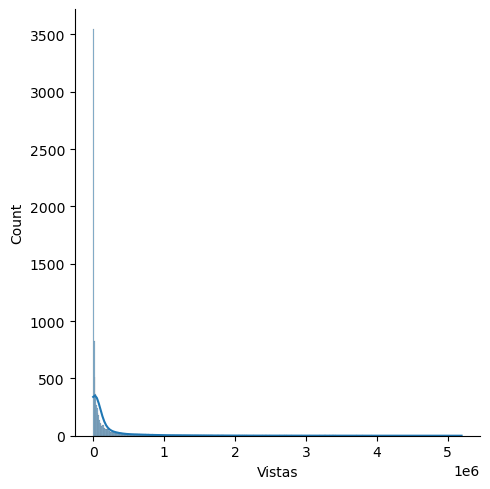

In [208]:
sns.displot(df['Vistas'], kde=True) 
sns.despine() 

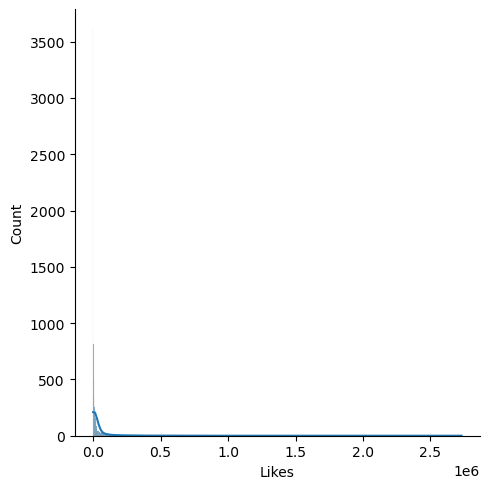

In [209]:
sns.displot(df['Likes'], kde=True) 
sns.despine() 

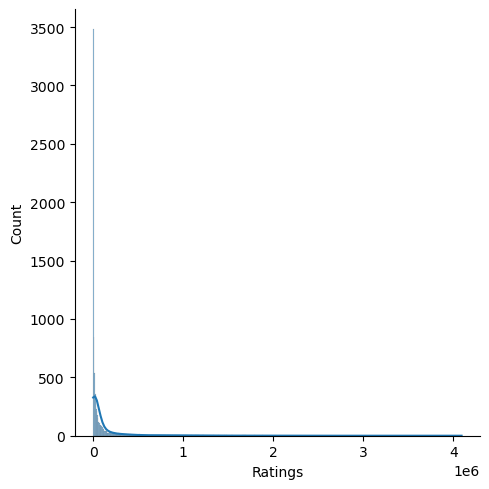

In [210]:
sns.displot(df['Ratings'], kde=True) 
sns.despine() 

La columna Vistas, Likes y Ratings presentan sesgo por lo tanto utilizaremos el metodo de rango intercuartilico para detectar outliers

*Vistas*

In [211]:
Q1 = df['Vistas'].quantile(0.25)
Q3 = df['Vistas'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Vistas'] < limite_inferior) | (df['Vistas'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Vistas']])

Cantidad de outliers encontrados: 1232
       Vistas
1     2488721
3     1596190
4      873068
6      283873
7     3014320
9      382201
14     390910
15    3922213
16    1658845
17     454236
18    4382819
19    1721440
21    3925603
23     519561
26    3305105
27     394218
29    1165736
30    2091002
31    3005454
32     974585
33     854912
34    2261367
35     961576
36     285509
37    1416463
42     641018
43    2122570
45     339653
46    1110951
49     421907
50     404921
52     914263
53    1625264
56    1276280
57     796013
58     568020
59     508208
60    3187177
61     968046
63     344535
65     538072
67    2498989
70     409550
71    1304225
72    2447949
75    1396966
76    1824988
77     841911
78    1199423
79     702090
80    3707328
81    3727510
82     778049
83    2542809
85     595905
86    1465568
91    1092521
92     856447
94    2157697
96     394589
97     454434
99    2605934
100    427170
101    555561
104    663697
106    289812
107   1287573
108    85

In [212]:
top10 = df.sort_values(by='Vistas', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
265                          Fight Club      David Fincher   
243                        Interstellar  Christopher Nolan   
7554                           Parasite       Bong Joon Ho   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
18                      The Truman Show         Peter Weir   
862                           Inception  Christopher Nolan   
1232                        Ratatouille          Brad Bird   
634                        Forrest Gump    Robert Zemeckis   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
265                    4.27            Drama     139.0      Germany  English   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los valores mas altos de Vistas vemos que no se trata de errores en los registros, ya que hay peliculas que realmente recibieron esas visitas. Analizamos las 10 peliculas mas vistas y observamos que son peliculas que fueron exitosas en los ultimos tiempos, por lo tanto conservaremos esos valores.

*Likes*

In [213]:
Q1 = df['Likes'].quantile(0.25)
Q3 = df['Likes'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Likes'] < limite_inferior) | (df['Likes'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Likes']])

Cantidad de outliers encontrados: 1308
        Likes
1      927538
3      493248
4      341567
6       85788
7     1057816
8       70932
9       93489
14     145995
15    1136383
16     573522
17     119958
18    1777004
19     320485
21    1848733
23     150137
26    1284212
27     127921
29     425618
30     711650
31     769362
32     243095
33     223097
34     418920
35     280039
36     104559
37     317746
42     155646
43     806865
45      95786
46     238616
47      59644
49     152006
50     129920
52     289940
53     609941
56     275346
57     188176
58     176511
59     106306
60    1145750
61     339312
63      99897
65      77050
67     893819
70     165491
71     333138
72     603611
75     521364
76     482105
77     169659
78     286808
79     155669
80    1725068
81    1305037
82      89164
83     469315
85     183439
86     431899
91     290416
92     225249
94     223861
96     130064
97      77815
99     925095
100    120537
101    163549
102     97602
103     6

In [214]:
top10 = df.sort_values(by='Likes', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
7554                           Parasite       Bong Joon Ho   
243                        Interstellar  Christopher Nolan   
265                          Fight Club      David Fincher   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
9826                             Barbie       Greta Gerwig   
7552                              Joker      Todd Phillips   
9126  Everything Everywhere All at Once   Daniel Scheinert   
21                             Whiplash    Damien Chazelle   
18                      The Truman Show         Peter Weir   
80                        Spirited Away     Hayao Miyazaki   

      Calificación_promedio           Genero  Duración         Pais  Lenguaje  \
7554                   4.55           Comedy     133.0  South Korea    Korean   
243                    4.41  Science Fiction     169.0           UK   English   
265                    4.27            Drama     139.0      Germany   Engl

Al igual que con la variable Vistas, cuando analizamos los valores mas altos de Likes vemos que no se trata de errores en los registros, ya que hay peliculas que realmente recibieron esa cantidad de Likes. Analizamos las 10 peliculas con mas Likes y observamos que son peliculas que fueron exitosas en los ultimos tiempos, por lo tanto conservaremos esos valores.

*Ratings*

In [215]:
Q1 = df['Ratings'].quantile(0.25)
Q3 = df['Ratings'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Ratings'] < limite_inferior) | (df['Ratings'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Ratings']])

Cantidad de outliers encontrados: 1227
      Ratings
1     1682389
3     1076949
4      600721
6      183927
7     1780203
9      238309
14     273809
15    2091274
16    1095317
17     273663
18    2926289
19     946010
21    2963756
23     375195
26    2237306
27     254656
29     783704
30    1444060
31    1478357
32     667040
33     463218
34    1227742
35     692373
36     200590
37     699777
42     415715
43    1349008
45     218640
46     601135
49     322277
50     296143
52     500015
53    1122283
56     794877
57     475573
58     377317
59     300512
60    1954265
61     703521
63     226651
65     303092
67    1708905
70     313375
71     836051
72    1253630
75    1029549
76    1089883
77     556523
78     666016
79     390535
80    2512581
81    2595230
82     300150
83    1391093
85     399341
86     950993
91     671894
92     552519
94    1220832
96     280871
97     276218
99    1540004
100    309495
101    375248
102    201792
103    178006
104    421889
106    17

In [216]:
top10 = df.sort_values(by='Ratings', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
7554                           Parasite       Bong Joon Ho   
243                        Interstellar  Christopher Nolan   
265                          Fight Club      David Fincher   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
9126  Everything Everywhere All at Once   Daniel Scheinert   
9825                        Oppenheimer  Christopher Nolan   
8943                               Dune   Denis Villeneuve   
21                             Whiplash    Damien Chazelle   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
7554                   4.55           Comedy     133.0  South Korea   Korean   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los outliers de la variable Ratings observamos que son las mismas peliculas que aparecieron con mas Vistas y Likes, por lo tanto también se conservaran estos valores 

**Objetivo específico 1:** analizar la aceptación de películas por protagonista, director, genero y país de origen según vistas y likes.

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\2020320025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Vistas', y='Protagonista', palette='Blues_d')


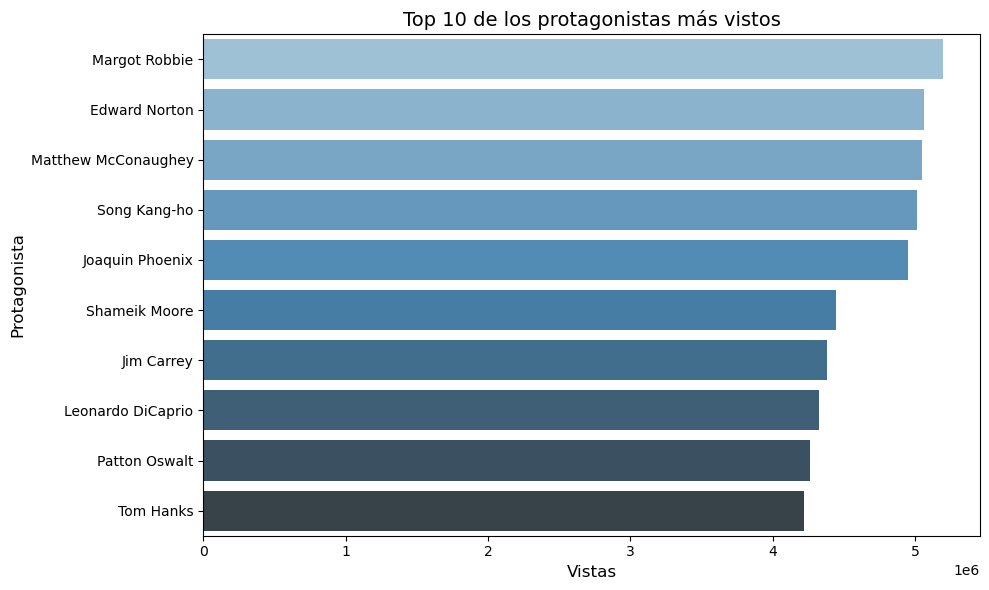

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\2020320025.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Likes', y='Protagonista', palette='Reds_d')


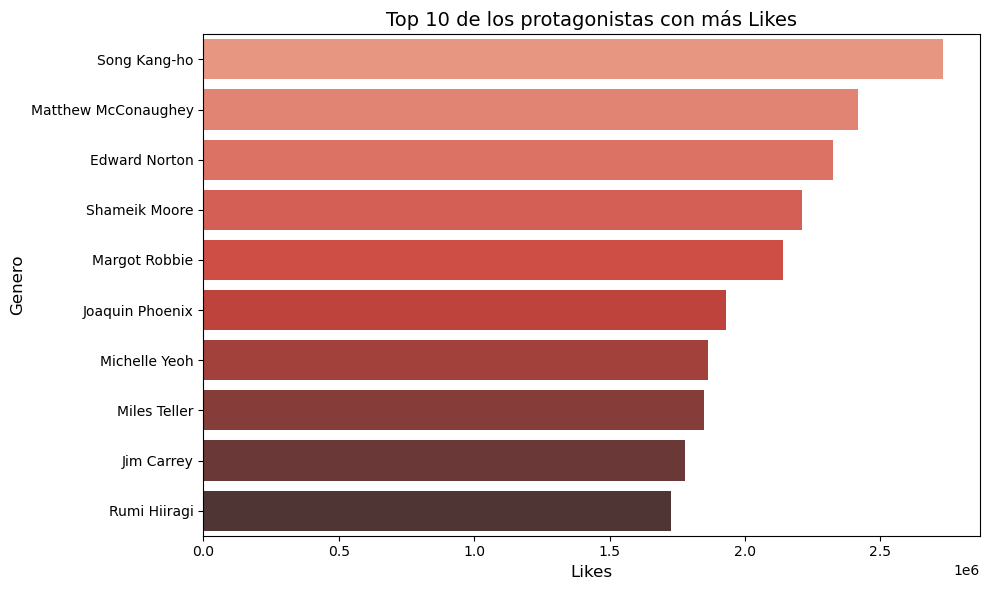

In [217]:
top_vistas = df[['Protagonista', 'Vistas']].sort_values(by='Vistas', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Vistas', y='Protagonista', palette='Blues_d')
plt.title('Top 10 de los protagonistas más vistos', fontsize=14)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Protagonista', fontsize=12)
plt.tight_layout()
plt.show()

top_vistas = df[['Protagonista', 'Likes']].sort_values(by='Likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Likes', y='Protagonista', palette='Reds_d')
plt.title('Top 10 de los protagonistas con más Likes', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Genero', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\3374905153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Vistas', y='Director', palette='Blues_d')


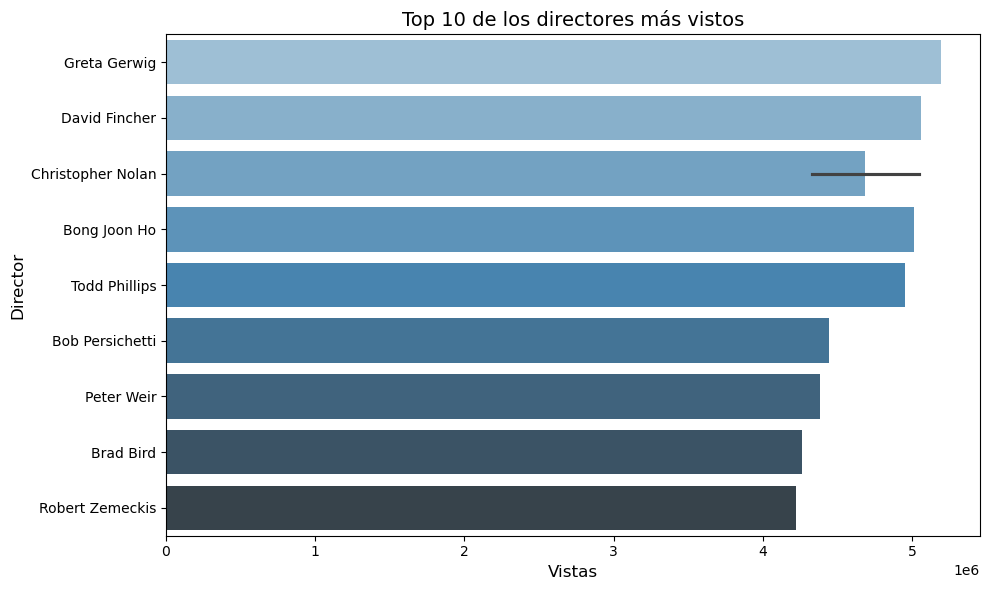

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\3374905153.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Likes', y='Director', palette='Reds_d')


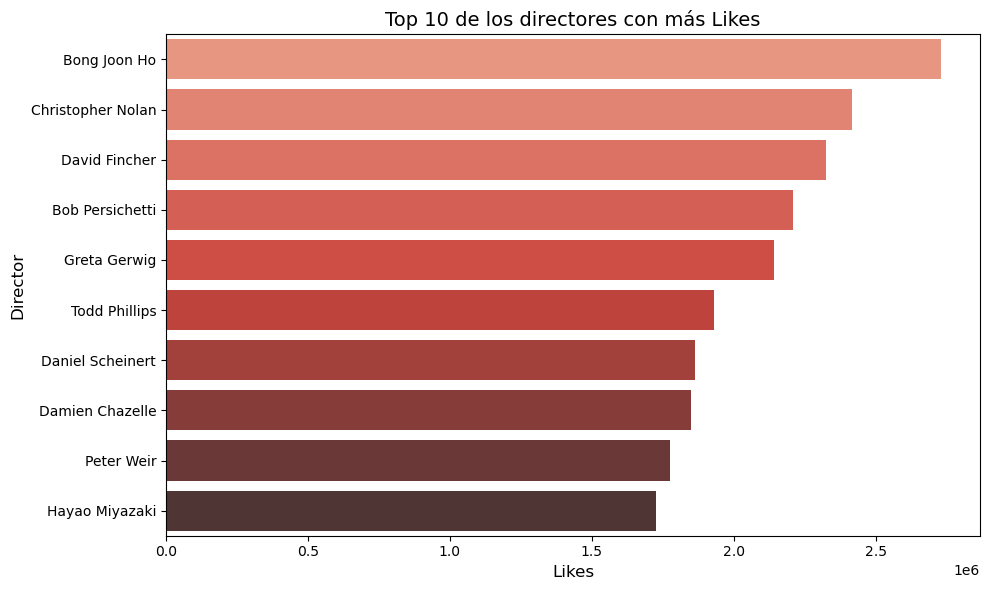

In [219]:
top_vistas = df[['Director', 'Vistas']].sort_values(by='Vistas', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Vistas', y='Director', palette='Blues_d')
plt.title('Top 10 de los directores más vistos', fontsize=14)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

top_vistas = df[['Director', 'Likes']].sort_values(by='Likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Likes', y='Director', palette='Reds_d')
plt.title('Top 10 de los directores con más Likes', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\474983678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Vistas', y='Genero', palette='Blues_d')


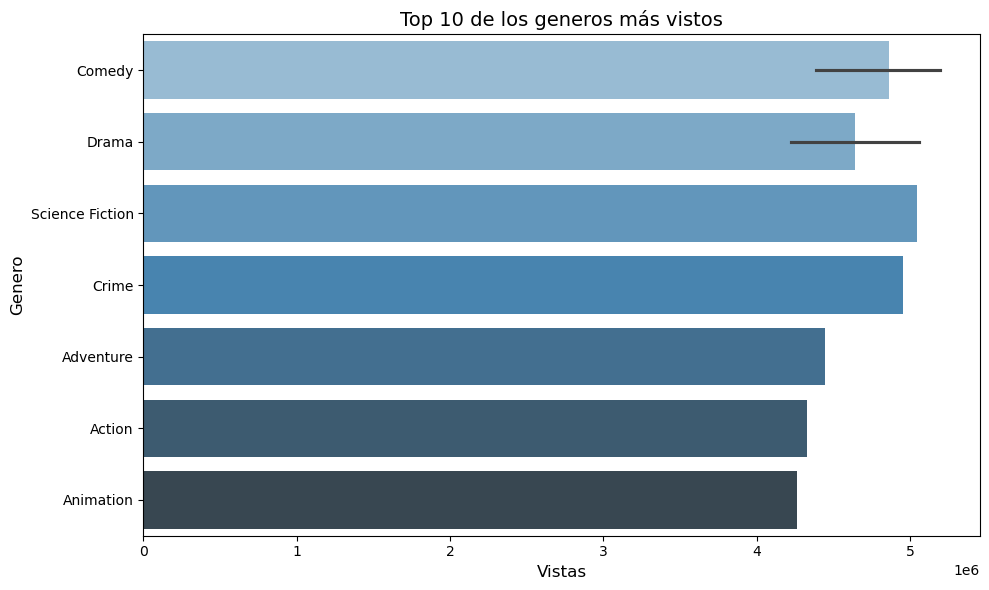

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\474983678.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Likes', y='Genero', palette='Reds_d')


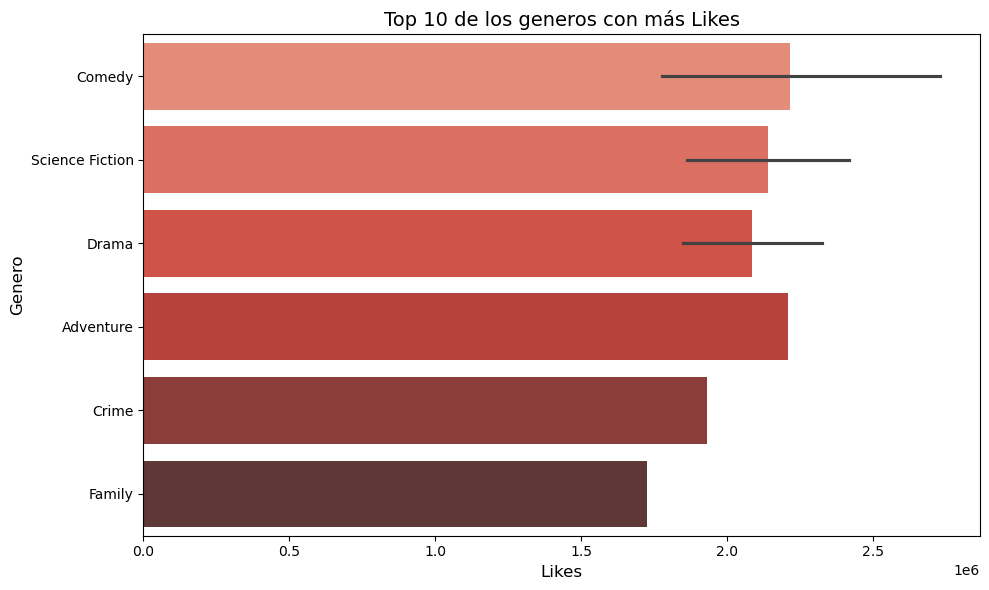

In [220]:
top_vistas = df[['Genero', 'Vistas']].sort_values(by='Vistas', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Vistas', y='Genero', palette='Blues_d')
plt.title('Top 10 de los generos más vistos', fontsize=14)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Genero', fontsize=12)
plt.tight_layout()
plt.show()

top_vistas = df[['Genero', 'Likes']].sort_values(by='Likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Likes', y='Genero', palette='Reds_d')
plt.title('Top 10 de los generos con más Likes', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Genero', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\1304937912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Vistas', y='Pais', palette='Blues_d')


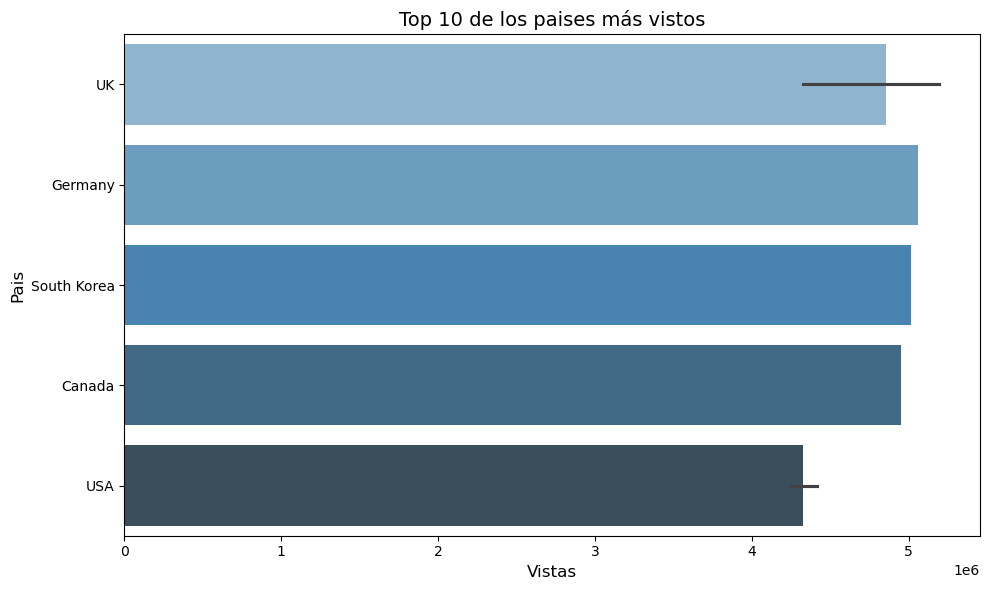

NameError: name 'df2' is not defined

In [221]:
top_vistas = df[['Pais', 'Vistas']].sort_values(by='Vistas', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Vistas', y='Pais', palette='Blues_d')
plt.title('Top 10 de los paises más vistos', fontsize=14)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.tight_layout()
plt.show()

top_vistas = df2[['Pais', 'Likes']].sort_values(by='Likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Likes', y='Pais', palette='Reds_d')
plt.title('Top 10 de los paises con más Likes', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.tight_layout()
plt.show()

*¿Que pasaría si este mismo analisis lo realizamos con la relación de likes sobre vistas?*

Creamos una nueva columna que se llamará Porcentaje_likes

In [222]:
df['Porcentaje_likes'] = (df['Likes'] / df['Vistas'])*100
print(df.columns)

Index(['Titulo', 'Director', 'Calificación_promedio', 'Genero', 'Duración',
       'Pais', 'Lenguaje', 'Descripcion', 'Productora', 'Vistas', 'Likes',
       'Ratings', 'Enlace', 'Protagonista', 'Coprotagonista', 'Corotagonista',
       'zscore', 'is_series', 'Porcentaje_likes'],
      dtype='object')


Observamos el rango de valores de la nueva columna

In [223]:
print("Valor mínimo:", df['Porcentaje_likes'].min())
print("Valor máximo:", df['Porcentaje_likes'].max())

Valor mínimo: 0.0
Valor máximo: 55.55555555555556


C:\Users\natie\AppData\Local\Temp\ipykernel_17160\2590358678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Porcentaje_likes', y='Protagonista', palette='Oranges_d')


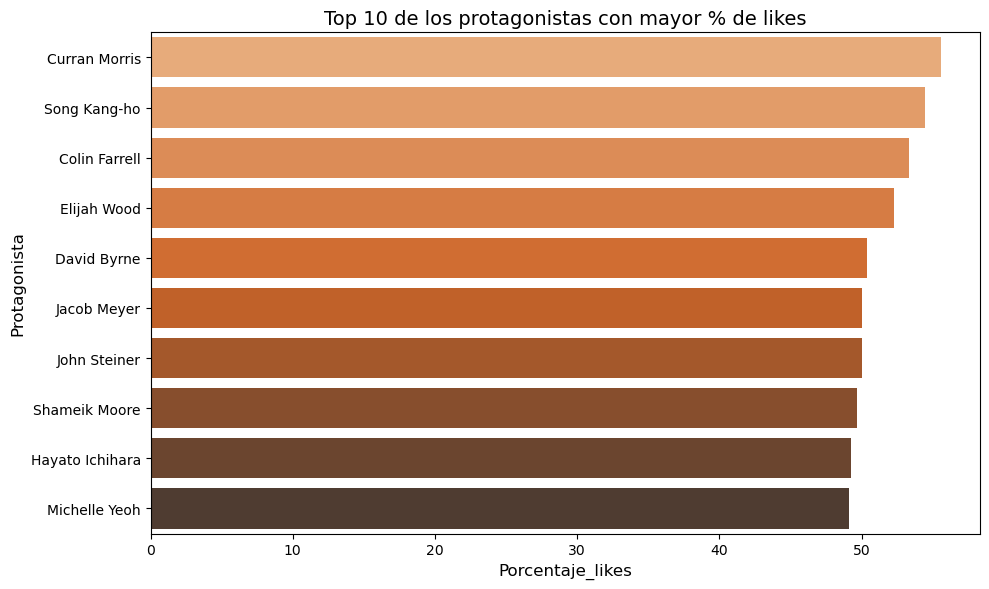

In [224]:
top_vistas = df[['Protagonista', 'Porcentaje_likes']].sort_values(by='Porcentaje_likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Porcentaje_likes', y='Protagonista', palette='Oranges_d')
plt.title('Top 10 de los protagonistas con mayor % de likes', fontsize=14)
plt.xlabel('Porcentaje_likes', fontsize=12)
plt.ylabel('Protagonista', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\239113093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Porcentaje_likes', y='Director', palette='Oranges_d')


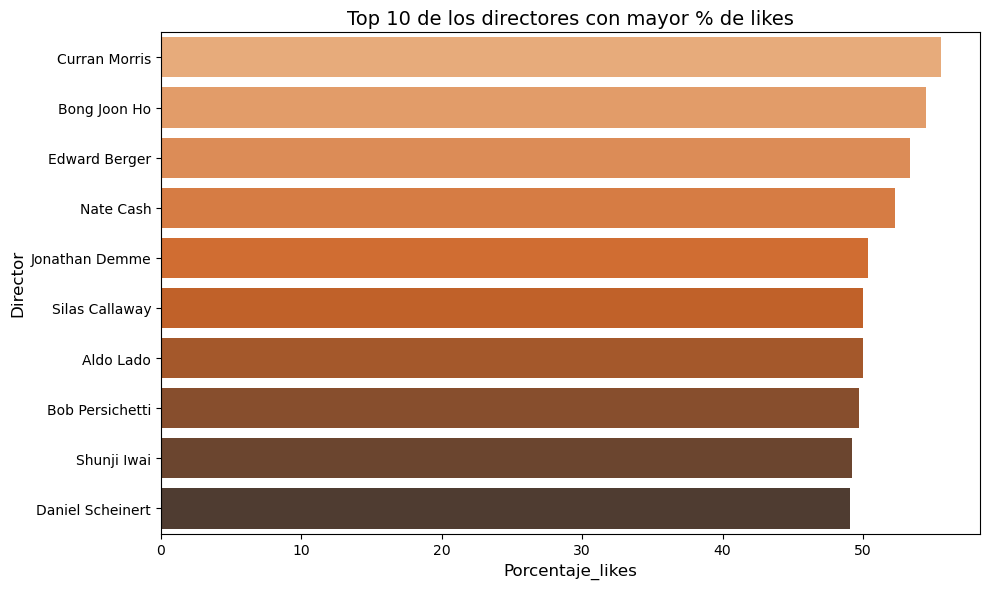

In [225]:
top_vistas = df[['Director', 'Porcentaje_likes']].sort_values(by='Porcentaje_likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Porcentaje_likes', y='Director', palette='Oranges_d')
plt.title('Top 10 de los directores con mayor % de likes', fontsize=14)
plt.xlabel('Porcentaje_likes', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

Analizamos el actor y director con mayor porcentaje, ya que es un nombre que no parecia en el top 10 analizando las variables por separado.

In [226]:
df_str = df.astype(str).apply(lambda x: x.str.lower())
filtro = df_str.apply(lambda row: row.str.contains('curran morris')).any(axis=1)
filas_con_curran_morris = df[filtro]
print(filas_con_curran_morris)

                 Titulo       Director  Calificación_promedio  Genero  \
9641  Soldiers & Saints  Curran Morris               3.268664  Action   

      Duración Pais Lenguaje  \
9641      45.0  USA  English   

                                            Descripcion  \
9641  Still reeling from Codey’s death, the C.A.M.F....   

                  Productora  Vistas  Likes  Ratings  \
9641  Curranator Productions       9      5        4   

                                            Enlace   Protagonista  \
9641  https://letterboxd.com/film/soldiers-saints/  Curran Morris   

     Coprotagonista Corotagonista    zscore  is_series  Porcentaje_likes  
9641     AJ Talbert  'AJ Talbert' -1.664451      False         55.555556  


Cuando evaluamos protagonista y director segun el porcentaje de likes observamos que aparecen diferentes resultados, quiza estos se encuntren más asociados a un modelo para realizar una recomendacion que las variables Vistas y Likes en valores absolutos.

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\760554034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Porcentaje_likes', y='Genero', palette='Oranges_d')


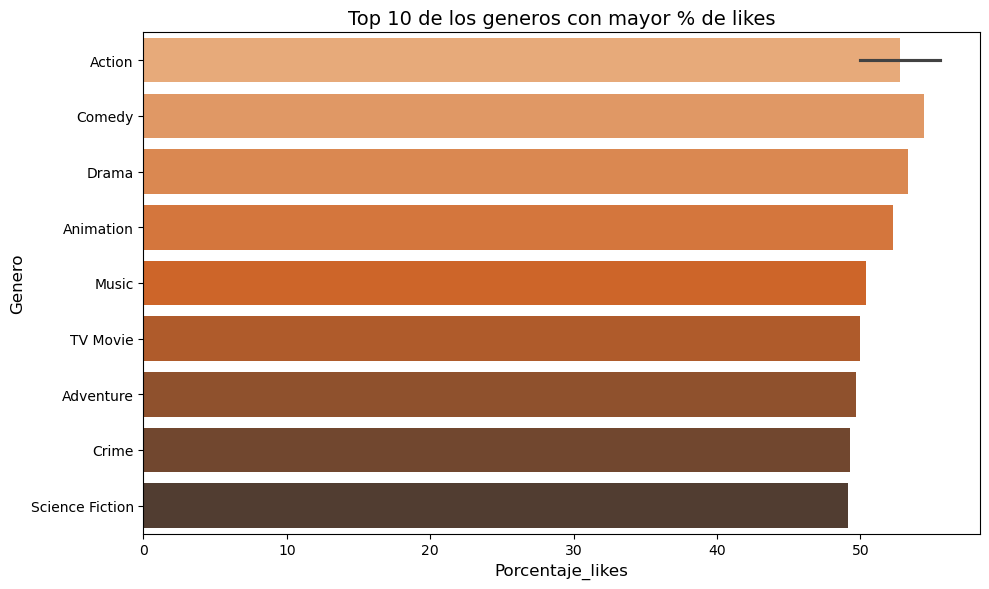

In [227]:
top_vistas = df[['Genero', 'Porcentaje_likes']].sort_values(by='Porcentaje_likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Porcentaje_likes', y='Genero', palette='Oranges_d')
plt.title('Top 10 de los generos con mayor % de likes', fontsize=14)
plt.xlabel('Porcentaje_likes', fontsize=12)
plt.ylabel('Genero', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\natie\AppData\Local\Temp\ipykernel_17160\737640191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vistas, x='Porcentaje_likes', y='Pais', palette='Oranges_d')


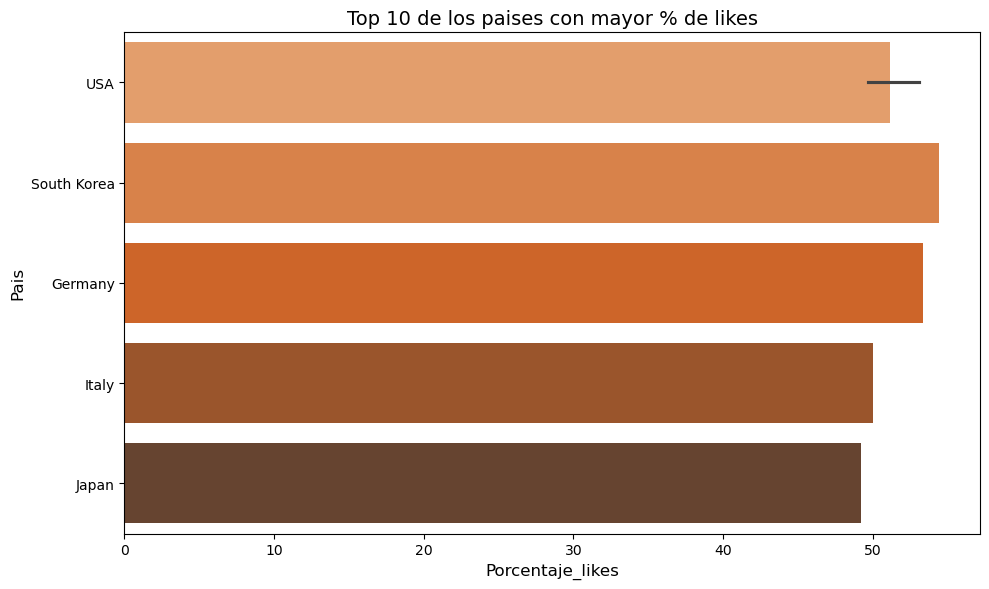

In [228]:
top_vistas = df[['Pais', 'Porcentaje_likes']].sort_values(by='Porcentaje_likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_vistas, x='Porcentaje_likes', y='Pais', palette='Oranges_d')
plt.title('Top 10 de los paises con mayor % de likes', fontsize=14)
plt.xlabel('Porcentaje_likes', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.tight_layout()
plt.show()

Los generos y paises también cambian el orden en el top 10 cuando analizamos el porcentaje de likes

**Objetivo específico 2:** determinar si existe relación, y cómo se comporta, entre la calificación, duración y likes con la variable vistas.

In [229]:
df[["Vistas" , "Calificación_promedio"]] = df[["Vistas", "Calificación_promedio"]].astype(float)
df.dtypes

Titulo                    object
Director                  object
Calificación_promedio    float64
Genero                    object
Duración                 float64
Pais                      object
Lenguaje                  object
Descripcion               object
Productora                object
Vistas                   float64
Likes                      int64
Ratings                    int64
Enlace                    object
Protagonista              object
Coprotagonista            object
Corotagonista             object
zscore                   float64
is_series                   bool
Porcentaje_likes         float64
dtype: object

In [230]:
correlation = df['Vistas'].corr(df["Calificación_promedio"])
print(correlation)

0.2574513111787698


In [231]:
correlation = df['Vistas'].corr(df["Duración"])
print(correlation)

0.2300383712203884


In [232]:
correlation = df['Vistas'].corr(df["Likes"])
print(correlation)

0.9505762601151886


Las variables Calificación promedio y Duración no tienen relación con la variable vistas, en cambio la variable likes tiene correlación positiva con dicha variable, por lo tanto procedemos a graficarla.

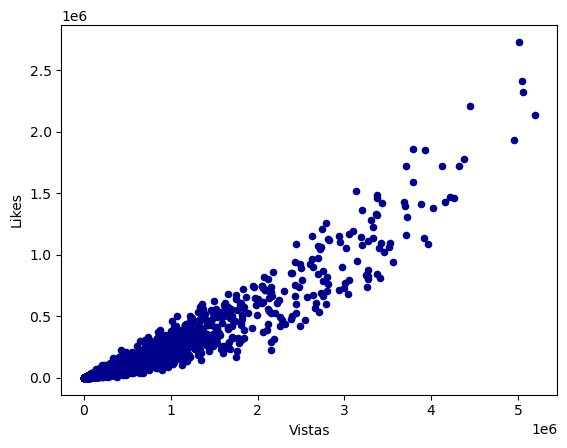

In [233]:
columns=(['Vistas', 'Likes'])
ax1 = df.plot.scatter(x='Vistas',
                      y='Likes',
                      c='DarkBlue')

**Escalado de variables**

Estandarización (Z-score): Calificación_promedio y Duración (variables con distribución normal)

In [234]:
#Importamos la libreria
from scipy.stats import zscore

In [235]:
#Aplicamos z-score
df['Calificación_promedio_zscore'] = zscore(df['Calificación_promedio'])

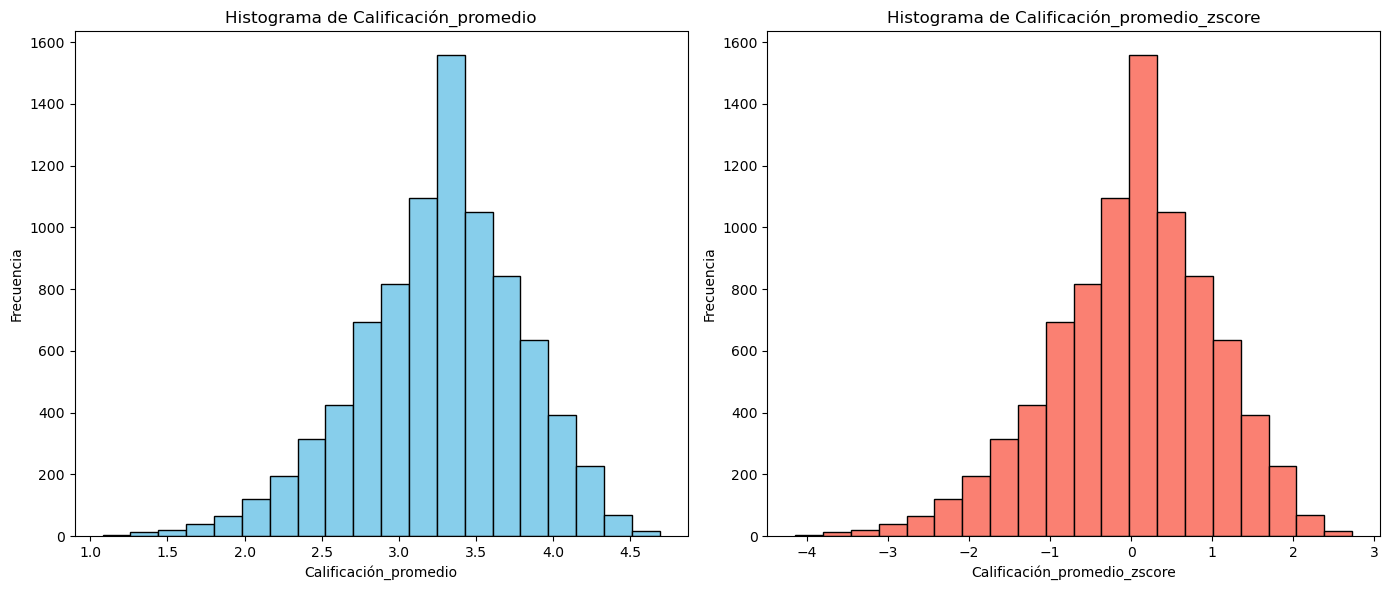

In [236]:
# Visualizamos: Histograma de la columna original y su z-score
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de la columna original
axes[0].hist(df['Calificación_promedio'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Calificación_promedio')
axes[0].set_xlabel('Calificación_promedio')
axes[0].set_ylabel('Frecuencia')

# Histograma de las puntuaciones z
axes[1].hist(df['Calificación_promedio_zscore'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma de Calificación_promedio_zscore')
axes[1].set_xlabel('Calificación_promedio_zscore')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Procedemos de la misma forma con la variable duración

In [237]:
#Aplicamos z-score
df['Duración_zscore'] = zscore(df['Duración'])

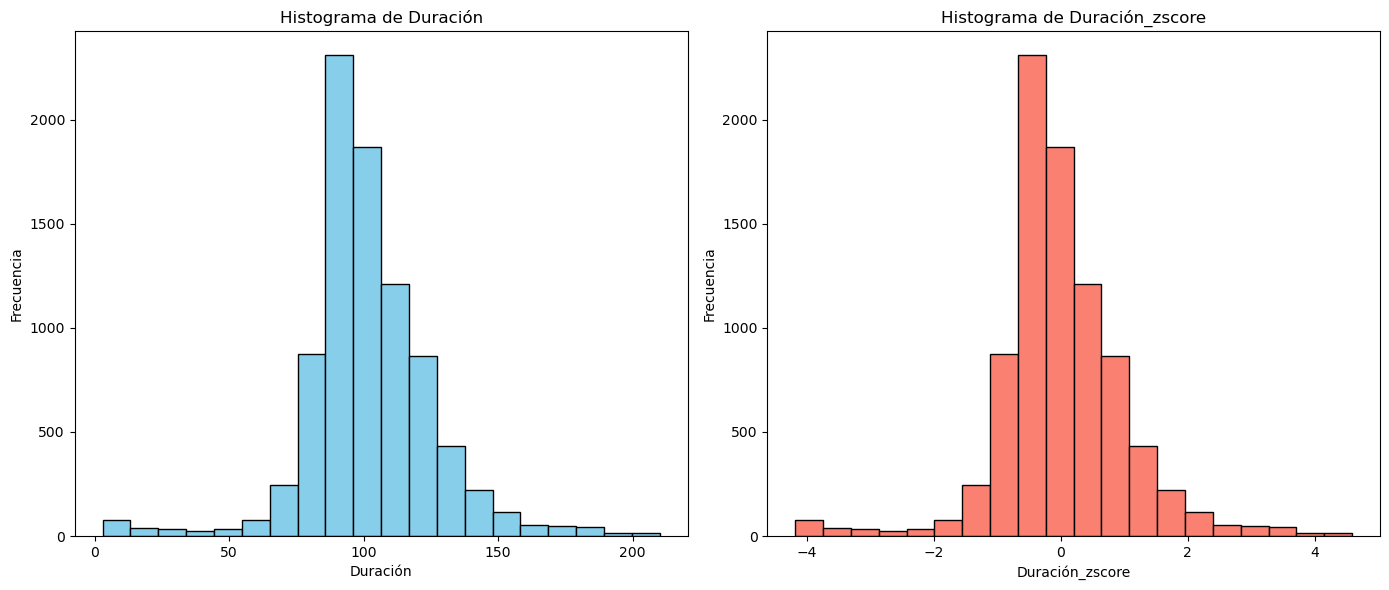

In [238]:
# Visualizamos: Histograma de la columna original y su z-score
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de la columna original
axes[0].hist(df['Duración'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Duración')
axes[0].set_xlabel('Duración')
axes[0].set_ylabel('Frecuencia')

# Histograma de las puntuaciones z
axes[1].hist(df['Duración_zscore'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma de Duración_zscore')
axes[1].set_xlabel('Duración_zscore')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Normalización (Min-Max): Vistas, Likes, Ratings (variables con sesgo)

In [239]:
#Aplicamos la Normalización Min-Max
df['Vistas_normalizadas'] = (df['Vistas'] - df['Vistas'].min()) / (df['Vistas'].max() - df['Vistas'].min())

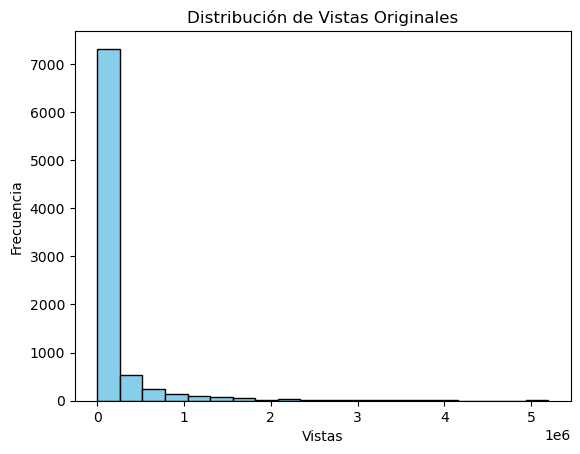

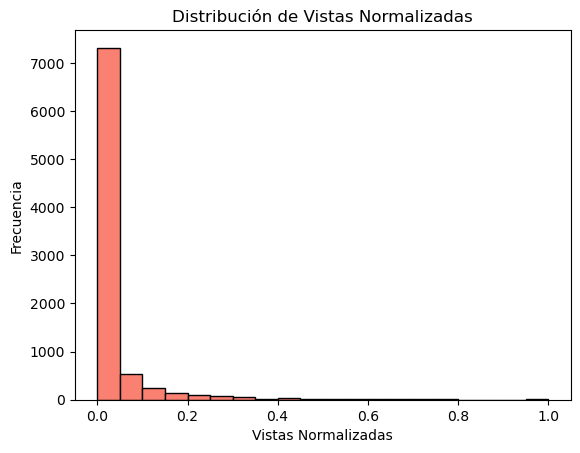

In [240]:
#Histograma de la columna original
plt.hist(df['Vistas'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Vistas Originales')
plt.xlabel('Vistas')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Vistas_normalizadas'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Vistas Normalizadas')
plt.xlabel('Vistas Normalizadas')
plt.ylabel('Frecuencia')
plt.show()

Seguimos con la variable Likes

In [241]:
df['Likes_normalizados'] = (df['Likes'] - df['Likes'].min()) / (df['Likes'].max() - df['Likes'].min())

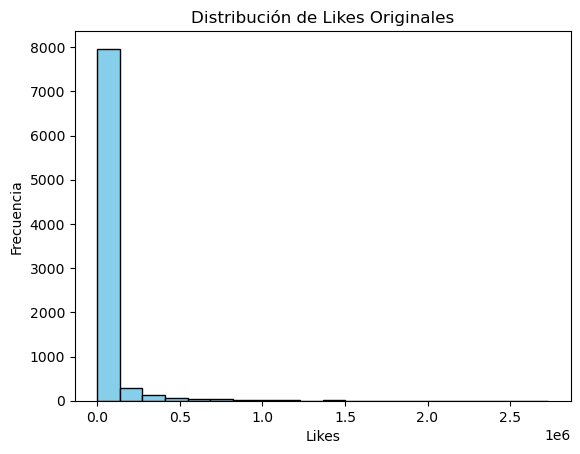

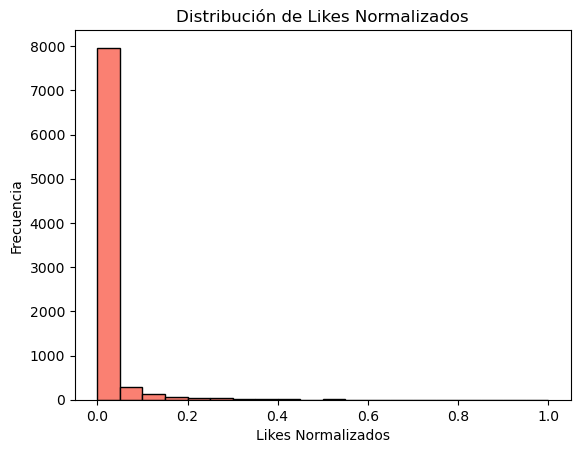

In [242]:
# Histograma de la columna original
plt.hist(df['Likes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Likes Originales')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Likes_normalizados'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Likes Normalizados')
plt.xlabel('Likes Normalizados')
plt.ylabel('Frecuencia')
plt.show()

In [243]:
df['Ratings_normalizados'] = (df['Ratings'] - df['Ratings'].min()) / (df['Ratings'].max() - df['Ratings'].min())

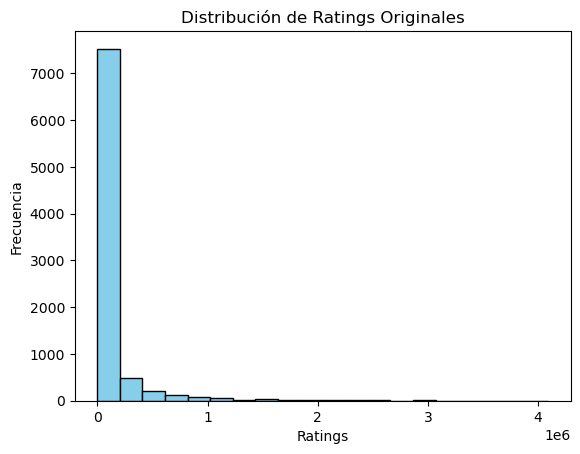

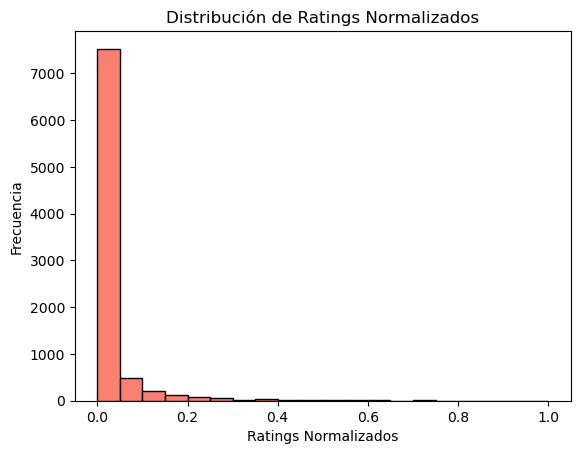

In [244]:
# Histograma de la columna original
plt.hist(df['Ratings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings Originales')
plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Ratings_normalizados'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Ratings Normalizados')
plt.xlabel('Ratings Normalizados')
plt.ylabel('Frecuencia')
plt.show()

Debemos realizar el escalado de Porcentaje_likes, pero primero debemos saber que distribución tiene, para elegir el metodo mas adecuado

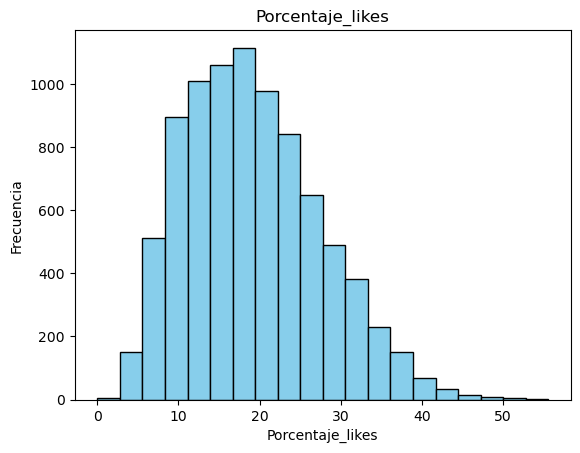

In [245]:
# Histograma de la columna original
plt.hist(df['Porcentaje_likes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Porcentaje_likes')
plt.xlabel('Porcentaje_likes')
plt.ylabel('Frecuencia')
plt.show()

Vemos que presenta una distribución sesgada a la izquierda, por lo tanto utilizaremos Normalización (min-max)

In [246]:
df['Porcentaje_likes'] = (df['Porcentaje_likes'] - df['Porcentaje_likes'].min()) / (df['Porcentaje_likes'].max() - df['Porcentaje_likes'].min())

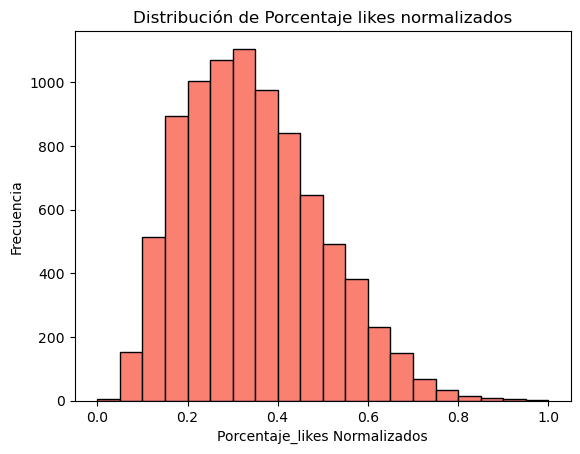

In [247]:
# Histograma de la columna normalizada
plt.hist(df['Porcentaje_likes'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Porcentaje likes normalizados')
plt.xlabel('Porcentaje_likes Normalizados')
plt.ylabel('Frecuencia')
plt.show()

In [248]:
df.to_csv('Movie_Data_File3.csv', index=False)